In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from pathlib import Path



/var/folders/vw/rptwys7j68lfdp94t00_zwsh0000gn/T/ipykernel_49783/2448436094.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
MODELS_DIR = Path("models/")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/iris_model.pk")
TF_MODEL_PATH = MODELS_DIR.joinpath("tf/iris_model")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)
TF_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)

# Train model using sklearn

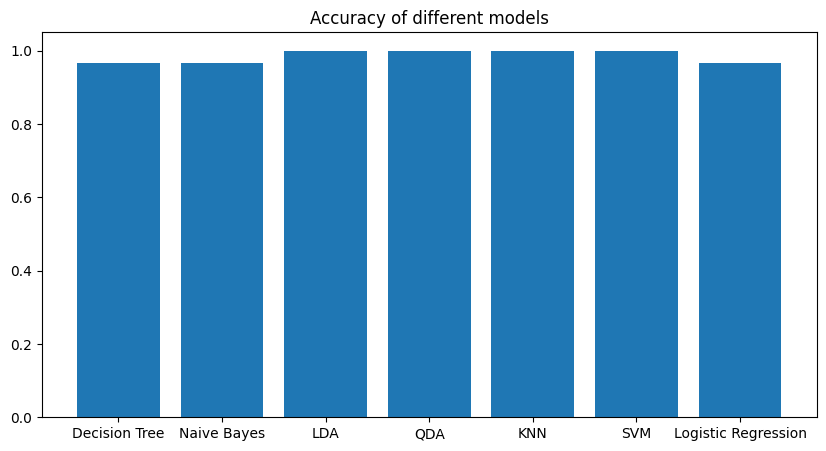

The best model is LDA with an accuracy of 1.00


In [15]:

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

X, y = df.drop("target", axis=1), df["target"]

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=1),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
}

# # Train the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = metrics.accuracy_score(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different models")
plt.show()


# Print results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]:.2f}")

# save the model to disk
pickle.dump(
    models[best_model], open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later


# Train model using Tensorflow

In [17]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path
import numpy as np

/Users/haruiz/Workspace/UAO-workspace/FullStack-AI-2024/code/iris-project/ml-model/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
train_dataset, metadata = tfds.load("iris", with_info=True, as_supervised=True, split="train", batch_size=32)
num_examples = metadata.splits["train"].num_examples
num_classes = metadata.features["label"].num_classes
labels = metadata.features["label"].names

2.0.0
Using /Users/haruiz/tensorflow_datasets/iris/2.1.0 instead.
2024-02-22 18:40:41.289152: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]
Extraction completed...: 100%|██████████| 4/4 [00:00<00:00,  7.06 file/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00,  1.75 url/s]
                                                                

Dataset iris downloaded and prepared to /Users/haruiz/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.


2024-02-22 18:40:44.155012: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-22 18:40:44.155034: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-02-22 18:40:44.155042: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-02-22 18:40:44.155091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-22 18:40:44.155125: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
num_examples

150

In [21]:
labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [22]:
num_classes

3

2024-02-22 18:41:00.095891: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(32, 4)


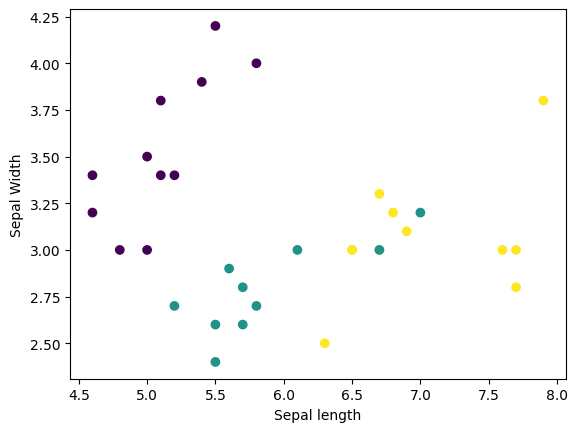

In [23]:
features, labels = next(iter(train_dataset))
sepal_length = features[:,0]
sepal_width = features[:,1]
print(features.shape)

plt.scatter(sepal_length,
            sepal_width,
            c=labels,
            cmap='viridis')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()

In [24]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,), name= "input"), 
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, name="output")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                50        
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 batch_normalization (Batch  (None, 5)                 20        
 Normalization)                                                  
                                                                 
 output (Dense)              (None, 3)                 18        
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 10 (40.00 Byte)
_________________________________________________________________


Epoch 1/50


2024-02-22 18:51:18.145573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-22 18:51:18.176496: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


5/5 [==============================] - 4s 170ms/step - loss: 1.0441 - accuracy: 0.4867
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 1.0125 - accuracy: 0.5200
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9829 - accuracy: 0.5667
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9553 - accuracy: 0.5667
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9296 - accuracy: 0.5800
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9056 - accuracy: 0.5800
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8832 - accuracy: 0.6000
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8622 - accuracy: 0.6133
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8424 - accuracy: 0.6133
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8239 - accuracy: 0.6267
Epoch 11/50
5/5 [==============================

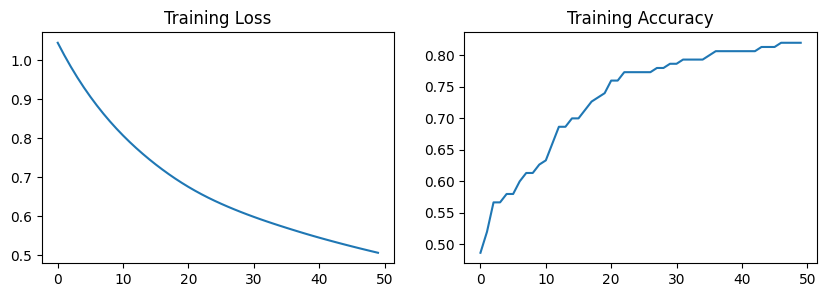

In [26]:
loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
opt_fun = tf.keras.optimizers.Adam()
model.compile(optimizer=opt_fun, loss=loss_fun, metrics=['accuracy'] )
history = model.fit(train_dataset, batch_size=12, epochs=50)

acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("Training Loss")
ax.plot(loss)
ax = plt.subplot(1, 2, 2)
ax.set_title("Training Accuracy")
ax.plot(acc)
plt.show()

In [27]:
predictions = model.predict([[0.5, 0.4, 0.8, 0.4]])

1/1 [==============================] - 1s 663ms/step


In [28]:
predictions

array([[0.00579161, 0.9900883 , 0.00412009]], dtype=float32)

In [29]:
model.save(TF_MODEL_PATH, save_format="tf")

INFO:tensorflow:Assets written to: models/tf/iris_model/assets


INFO:tensorflow:Assets written to: models/tf/iris_model/assets


In [ ]:
import shutil
from pathlib import Path
from google.colab import files
import sys

def folder_to_zip(folder_path):
    folder_path = Path(folder_path)
    if not folder_path.exists():
        return
    shutil.make_archive(folder_path.name, 'zip', folder_path)
    return folder_path.with_suffix(".zip")

def zip_and_download_folder_content(model_folder):
    zip_file = folder_to_zip(model_folder)
    files.download(zip_file)



In [ ]:
zip_and_download_folder_content(MODELS_DIR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>